In [1]:
from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

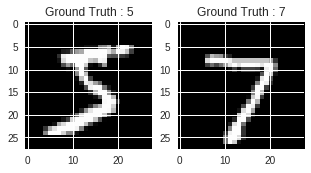

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (54000, 10), (6000, 10))

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='linear'))
mnist_model.add(Dense(num_classes, activation='softmax'))

In [0]:
mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [14]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [15]:
mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 12s 230us/step - loss: 0.1535 - acc: 0.9534 - val_loss: 0.0677 - val_acc: 0.9797
Epoch 2/20
54000/54000 [==============================] - 11s 195us/step - loss: 0.0608 - acc: 0.9812 - val_loss: 0.0610 - val_acc: 0.9798
Epoch 3/20
54000/54000 [==============================] - 11s 199us/step - loss: 0.0491 - acc: 0.9844 - val_loss: 0.0479 - val_acc: 0.9842
Epoch 4/20
54000/54000 [==============================] - 11s 197us/step - loss: 0.0393 - acc: 0.9873 - val_loss: 0.0491 - val_acc: 0.9847
Epoch 5/20
54000/54000 [==============================] - 10s 192us/step - loss: 0.0314 - acc: 0.9898 - val_loss: 0.0586 - val_acc: 0.9822
Epoch 6/20
54000/54000 [==============================] - 10s 181us/step - loss: 0.0296 - acc: 0.9902 - val_loss: 0.0542 - val_acc: 0.9837
Epoch 7/20
54000/54000 [==============================] - 10s 178us/step - loss: 0.0255 - acc: 0.9922 - val_loss: 0.0

In [0]:
test_eval = mnist_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [17]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0871501913528613
Test accuracy: 0.9864


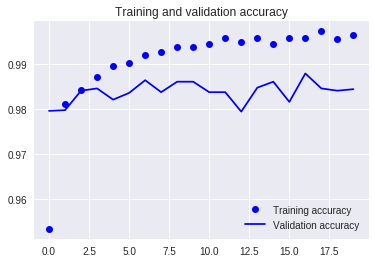

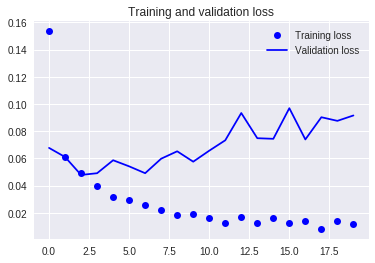

In [18]:
accuracy = mnist_train.history['acc']
val_accuracy = mnist_train.history['val_acc']
loss = mnist_train.history['loss']
val_loss = mnist_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = mnist_model.predict(test_X)

In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9864 correct labels


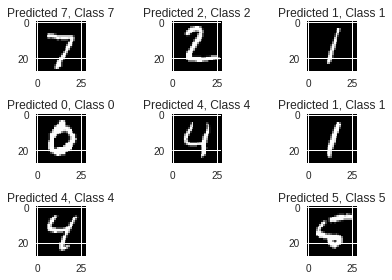

In [21]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 136 incorrect labels


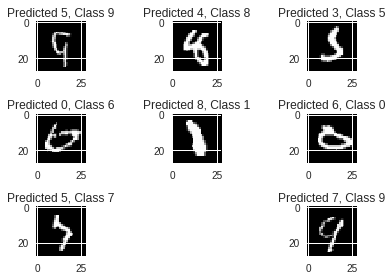

In [22]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [23]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.98      0.99      0.99       980
    Class 1       0.99      0.99      0.99      1135
    Class 2       0.98      0.99      0.99      1032
    Class 3       0.99      0.99      0.99      1010
    Class 4       0.98      0.98      0.98       982
    Class 5       0.98      0.99      0.98       892
    Class 6       0.99      0.98      0.98       958
    Class 7       0.99      0.98      0.98      1028
    Class 8       0.99      0.98      0.99       974
    Class 9       0.98      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [24]:
index_mask = np.where(test_Y_one_hot[:, 2])[0]
print(index_mask)
subset_mask = np.random.choice(index_mask, 10)
print(subset_mask)

[   1   35   38 ... 9980 9985 9995]
[2439 4401 3212 4905 6281 5863 3577 9696 7364 3796]


In [25]:
original_images = test_X[subset_mask]
original_labels = test_Y_one_hot[subset_mask]
original_labels

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
predicted_2 = mnist_model.predict(original_images)

In [27]:
prediction_val = np.argmax(np.round(predicted_2),axis=1)
print("predictions", prediction_val)

predictions [2 2 2 2 2 2 2 2 2 2]


In [28]:
probabilities_val = mnist_model.predict_proba(original_images)
print ("probabilities", probabilities_val)

probabilities [[3.35826828e-23 9.69292090e-24 1.00000000e+00 3.52342582e-15
  9.16371508e-38 6.09086444e-36 5.50827096e-27 6.79829221e-23
  6.41715059e-23 1.32670212e-29]
 [2.63784238e-11 2.99193425e-16 1.00000000e+00 3.22977201e-10
  1.92481666e-23 1.57547485e-20 2.41117873e-22 1.38025344e-12
  1.94770328e-11 4.55642804e-18]
 [1.37117111e-32 2.71296001e-28 1.00000000e+00 3.38806805e-24
  3.74046247e-24 0.00000000e+00 2.48254287e-36 9.05021462e-24
  2.33120230e-26 1.57437670e-26]
 [1.40042275e-20 6.29860373e-23 1.00000000e+00 4.16536155e-16
  6.74422178e-33 6.30842727e-34 5.37654643e-35 1.34294560e-21
  3.92450561e-16 1.38766464e-21]
 [4.14426678e-38 3.38974091e-21 1.00000000e+00 1.31437353e-17
  4.69860116e-21 2.42245722e-27 3.66767331e-36 4.20675916e-20
  1.76494100e-26 1.35239466e-21]
 [3.66899720e-24 1.43600832e-20 1.00000000e+00 3.17407602e-25
  0.00000000e+00 7.89351287e-35 2.50171604e-30 2.58446317e-27
  1.28270096e-19 8.04094798e-34]
 [4.38680429e-12 6.70023948e-19 1.00000000e+

Correct label 2
Predicted label: 2
Confidence: 1.0


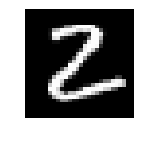

Correct label 2
Predicted label: 2
Confidence: 1.0


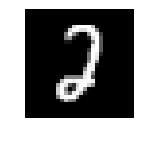

Correct label 2
Predicted label: 2
Confidence: 1.0


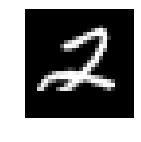

Correct label 2
Predicted label: 2
Confidence: 1.0


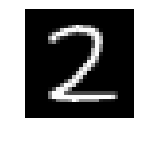

Correct label 2
Predicted label: 2
Confidence: 1.0


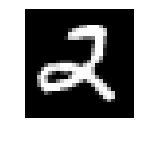

Correct label 2
Predicted label: 2
Confidence: 1.0


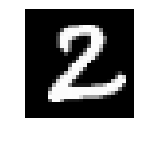

Correct label 2
Predicted label: 2
Confidence: 1.0


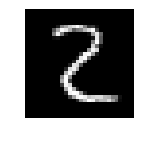

Correct label 2
Predicted label: 2
Confidence: 0.99997663


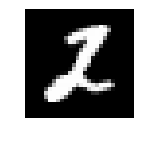

Correct label 2
Predicted label: 2
Confidence: 1.0


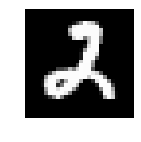

Correct label 2
Predicted label: 2
Confidence: 0.9999969


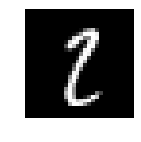

In [29]:
for i in range(0, 10):
    print('Correct label', np.argmax(original_labels[i]))
    print('Predicted label:', prediction_val[i])
    print('Confidence:', np.max(probabilities_val[i]))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(original_images[i].reshape([28, 28]),cmap = "gray")
    plt.show()

In [0]:
target_number = 6
target_labels = np.zeros(original_labels.shape)
target_labels[:, target_number] = 1

In [31]:
target_labels

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [0]:
adversarial_images = original_images.copy()

In [0]:
from keras import backend as K

gradients = K.gradients(loss, mnist_model.input)

In [61]:
adv_img_hist = list()
prob2_hist = list()
prob6_hist = list()

for i in range(10):
  target = to_categorical(target_number)
  target_variable = K.variable(target)
  loss = keras.metrics.categorical_crossentropy(mnist_model.input, target_variable)
  gradients = K.gradients(loss, mnist_model.input)
  get_grad_values = K.function([mnist_model.input], gradients)
  grad_values = get_grad_values([adversarial_images])[0]
  adversarial_images = adversarial_images + 0.5 * np.sign(grad_values)
  adversarial_images = np.clip(adversarial_images, a_min=0, a_max=1)
  adv_img_hist.append(adversarial_images)
  prediction = mnist_model.predict(adversarial_images)
  print("predictions", prediction_val)
  probs = mnist_model.predict_proba(adversarial_images)
  print('Confidence 2:', np.max(probs[:, 2]))
  print('Confidence 6:', np.max(probs[:, 6]))
prob2_hist.append(probs[:,2])
prob6_hist.append(probs[:,6])

predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11
predictions [2 2 2 2 2 2 2 2 2 2]
Confidence 2: 1.3540596e-32
Confidence 6: 1.4071229e-11


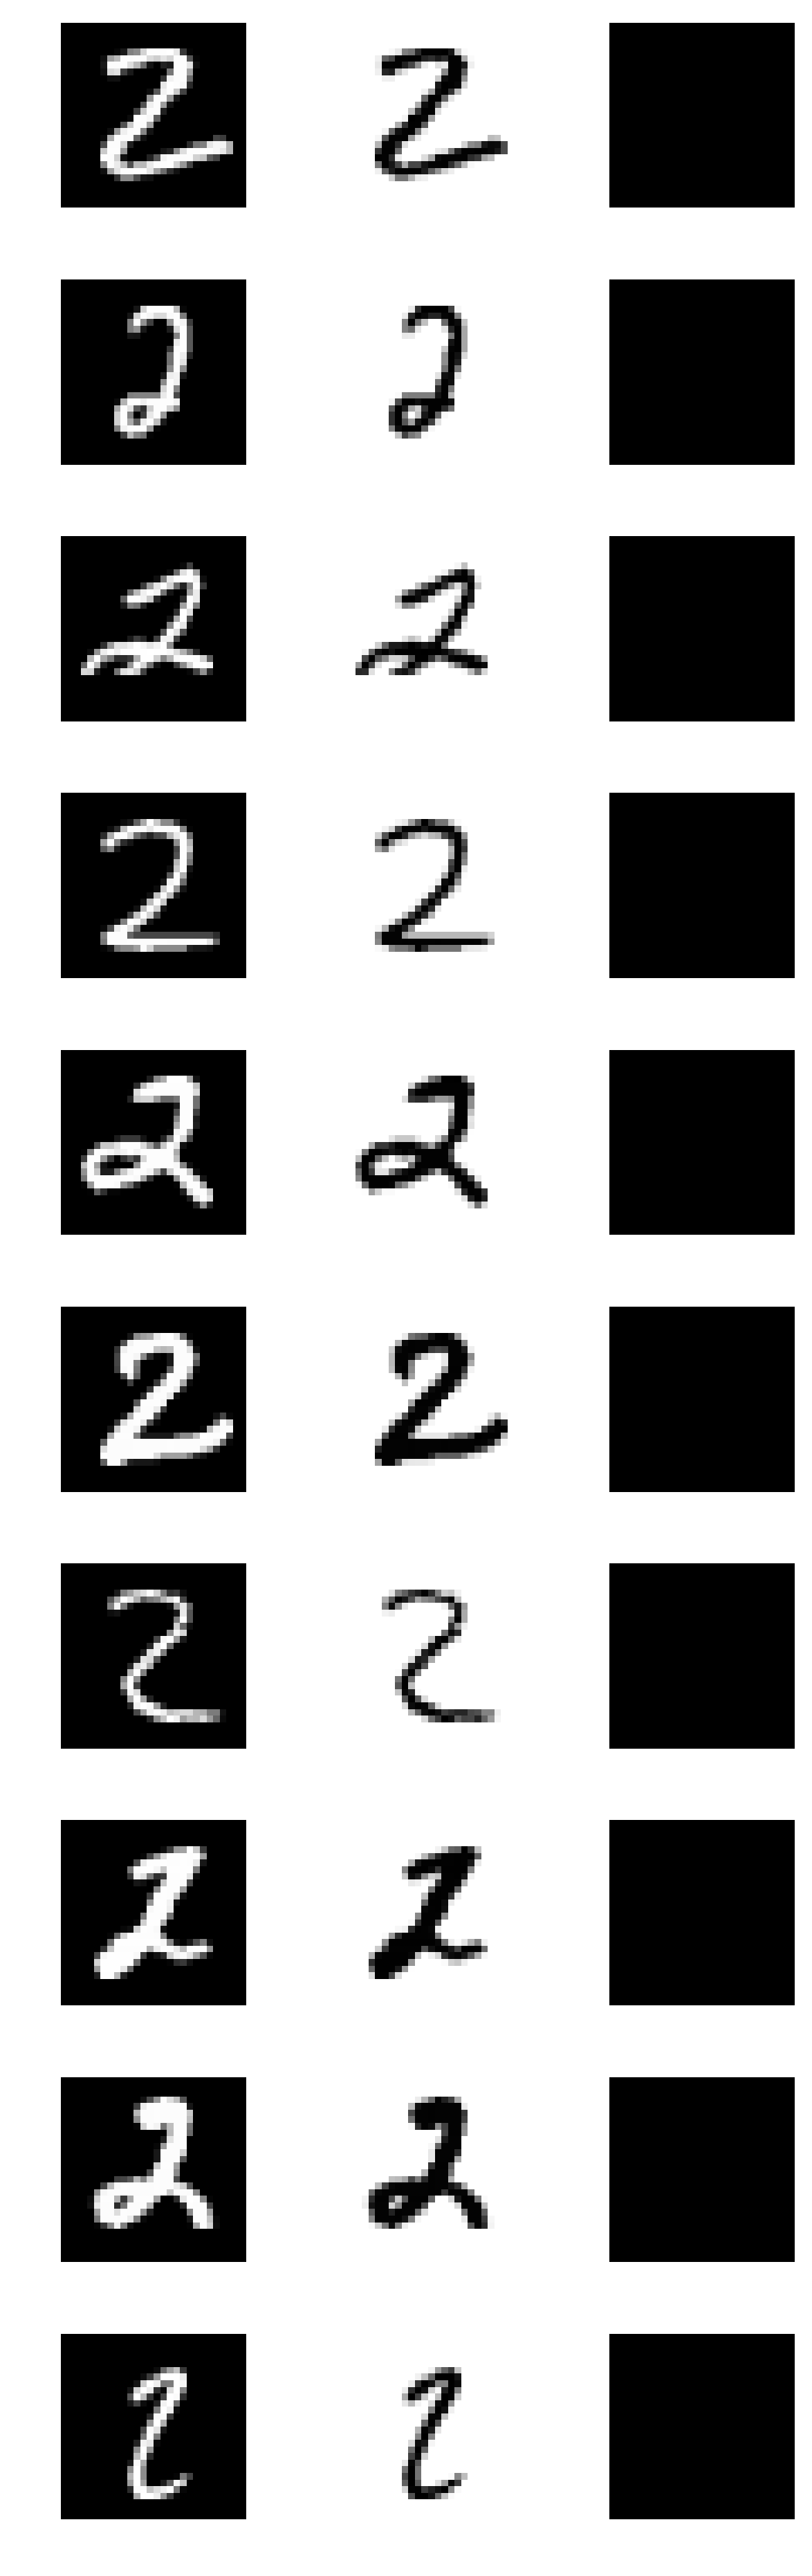

In [62]:
f, axarr = plt.subplots(10, 3, figsize=(5,15))
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250
for i in range(10):
    axarr[i,0].set_axis_off()
    axarr[i,1].set_axis_off()
    axarr[i,2].set_axis_off()
    axarr[i,0].imshow(original_images[i].reshape([28, 28]), cmap = "gray")
    axarr[i,1].imshow((adv_img_hist[0][i] - original_images[i]).reshape([28, 28]), cmap = "gray")
    axarr[i,2].imshow((adv_img_hist[0][i]).reshape([28, 28]), cmap="gray")
    
plt.tight_layout()
plt.show()
f.savefig("result.png")